In [ ]:
#I have discussed the approach of couple of questions with Jibin Thomas and Ravi Sanker

## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [14]:
import numpy as np
import pandas as pd
import re
import glob
import copy

%matplotlib inline
import matplotlib.pyplot as plt

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [4]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    files = glob.glob("./data_raw/*.x*")
    return files


# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['./data_raw/Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', './data_raw/Python-QUIZ Functions (18 min.)-grades.xlsx', './data_raw/Python-QUIZ Coercion (6 min.)-grades.xlsx', './data_raw/Python-QUIZ Strings (5 min.)-grades.xlsx', './data_raw/Python-QUIZ Lists (10 min.)-grades.xlsx', './data_raw/Python-QUIZ Iterations (6 min.)-grades.xlsx', './data_raw/Python-QUIZ Sets (7 min)-grades.xlsx', './data_raw/Python-QUIZ Exceptions (10 min.)-grades.xlsx', './data_raw/Python-QUIZ Dictionaries (10 min.)-grades.xlsx', './data_raw/Python-QUIZ Tuples (10 min.)-grades.xlsx', './data_raw/Python-QUIZ Conditionals (6 min.)-grades.xlsx']


### __Question 2: Write a function to return the name of the excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [5]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    pattern = re.compile(s)
    filename = [file for file in files if pattern.search(file)]
    if filename:
        return filename[0]
    else:
        return ''
        

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

./data_raw/Python-QUIZ Dictionaries (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [6]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    #Utilizing Q2_function to get the filename,from parameter 'files', which matches the string s
    filename = Q2_function(files,s)
    #Importing the excel file using the pandas function read_excel
    file_content = pd.read_excel(filename)
    return file_content


# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
print(functions_df)
# functions_df.head(3)

       State                  Started on                   Completed  \
0   Finished    February 5 2018  3:19 PM    February 5 2018  3:34 PM   
1   Finished    February 4 2018  4:01 PM    February 4 2018  4:19 PM   
12  Finished    February 6 2018  3:57 PM    February 6 2018  4:12 PM   
2   Finished   February 10 2018  4:05 PM   February 10 2018  4:23 PM   
3   Finished    February 4 2018  4:59 PM    February 4 2018  5:16 PM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:38 PM   
5   Finished   February 10 2018  9:49 PM  February 10 2018  10:07 PM   
6   Finished    February 5 2018  8:30 PM    February 5 2018  8:48 PM   
7   Finished   February 13 2018  4:17 AM   February 13 2018  4:35 AM   
8   Finished   February 12 2018  2:19 PM   February 12 2018  2:35 PM   
9   Finished  February 13 2018  10:45 AM  February 13 2018  11:03 AM   
10  Finished   February 11 2018  1:48 AM   February 11 2018  2:06 AM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:3

### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function`).

Learn about returning multiple values in Python.

In [7]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    #Column names using the DataFrame.columns function and explicit coercion to list data type
    col_names = list(dataframe.columns)
    #Creating a list to store the required columns
    vars_to_keep = ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", 
                    "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
    #Creating the subset using the dataframe.loc method
    df_subset =dataframe.loc[:,vars_to_keep]
    df_subset_head = df_subset.head(10)
    #Return a tuple of column names, dataframe subset and dataframe head
    return col_names,df_subset,df_subset_head


# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
12  12  15 mins 44 secs           20           3            4           3   
2    2          18 mins           30           5            6           6   
3    3  17 mins 31 secs           26           5            6           6   
4    4  17 mins 59 secs           25           5            6           6   
5    5          18 mins           24           5            6           6   
6    6          18 mins           23           5            6           0   
7    7    18 mins 1 sec           23           4            4           6   
8    8  16 mins 44 secs           22       

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [8]:
def Q5_function(df):
    
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    df = copy.copy(df)
    #Identifying the column datatypes using pd.DataFrame.dtypes method in pandas and using list comprehension to convert the dtypes into the required format
    column_dtype = [str(dtype) for dtype in list(df.dtypes)]
    #Strip all whitespaces from the columns by using sub function in re module and list comprehension
    df.columns = [re.sub(r'\s+','',col) for col in df.columns]
    #Replacing all the empty values in the 'Time taken' column with None as DataFrame.isnull() does not affect empty values
    #Using pd.DataFrame.replace to replace empty value with None
    df['Timetaken'] = df['Timetaken'].replace(r'^\s*$',None,regex = True)
    #Checking if DataFrame.isnull() is True for the 'Timetaken' column. If yes, replacing it with 0
    if df['Timetaken'].isnull().any(0):
        df['Timetaken'].fillna(0)
    #Converting 'Timetaken' column into seconds
    mins_pattern = re.compile('(?P<mins>\d*)( min)')
    secs_pattern = re.compile('(?P<secs>\d*)( sec)')
    df['mins'] = 0
    df['secs'] = 0
    for idx in range(df['Timetaken'].size):
        if re.search(mins_pattern,df['Timetaken'].iloc[idx]):
            df['mins'].iloc[idx] = int(re.search(mins_pattern,df['Timetaken'].iloc[idx]).groupdict()['mins'])
        else:
            df['mins'].iloc[idx] = 0            
        if re.search(secs_pattern,df['Timetaken'].iloc[idx]):
            df['secs'].iloc[idx] = int(re.search(secs_pattern,df['Timetaken'].iloc[idx]).groupdict()['secs'])
        else:
            df['secs'].iloc[idx] = 0
    df['time'] = df['mins']*60 + df['secs']
    df = df.drop(['Timetaken','mins','secs'],axis = 1)    
    return column_dtype,df


# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)

/Users/Shawn/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Column Datatypes
['int64', 'object', 'int64', 'int64', 'int64', 'int64', 'object', 'object', 'object']

New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6     3.00     12.00   
1    1           31         5          8         6        -     12.00   
12  12           20         3          4         3        -     10.00   
2    2           30         5          6         6     3.00     10.00   
3    3           26         5          6         6     3.00      6.00   
4    4           25         5          6         6     6.00      2.00   
5    5           24         5          6         6     3.00      4.00   
6    6           23         5          6         0     0.00      6.00   
7    7           23         4          4         6     3.00      6.00   
8    8           22         4          4         6     0.00      8.00   
9    9           22         5          8         6     3.00         -   

### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [9]:
def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    #Creating a copy of the argument
    Q6_df = copy.copy(df)
    #Converting column types into 'int' using the df.to_numeric functions.
    #Identifying columns which are not int or float
    col_type = [str(dtype) for dtype in list(Q6_df.dtypes)]
    col_idx = [idx for idx,item in enumerate(col_type) if item not in ('int64','float64')]
    #The argument 'errors' in the function will be set to 'coerce' to replace invalid values with np.nan
    Q6_df.iloc[:,col_idx]=Q6_df.iloc[:,col_idx].apply(pd.to_numeric,errors = 'coerce')
    #Dropping duplicate rows 
    Q6_df.drop_duplicates(inplace = True)
    Q6_df.fillna(value = Q6_df.mean(axis = 0,skipna = True),axis = 0,inplace = True)
    #creating a list with the mean of each column
    Q6_mean_list = list(Q6_df.mean(axis = 0))
    #Changing the 'id' value of mean vector to max(id) + 1
    Q6_mean_list[0] = max(Q6_df['id']) + 1
    #Creating a dataframe with 1 row and 9 columns
    mean_df = pd.DataFrame(data=[Q6_mean_list],columns=list(Q6_df.columns))
    #Using pd.concat to concatenate the two DataFrame
    final_df = pd.concat([Q6_df,mean_df],ignore_index = True)
    return final_df 


# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)

    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00  Q.4/6.00  Q.5/12.00  \
0    0    32.000000  5.000000   6.000000  6.000000       3.0      12.00   
1    1    31.000000  5.000000   8.000000  6.000000       2.0      12.00   
2   12    20.000000  3.000000   4.000000  3.000000       2.0      10.00   
3    2    30.000000  5.000000   6.000000  6.000000       3.0      10.00   
4    3    26.000000  5.000000   6.000000  6.000000       3.0       6.00   
5    4    25.000000  5.000000   6.000000  6.000000       6.0       2.00   
6    5    24.000000  5.000000   6.000000  6.000000       3.0       4.00   
7    6    23.000000  5.000000   6.000000  0.000000       0.0       6.00   
8    7    23.000000  4.000000   4.000000  6.000000       3.0       6.00   
9    8    22.000000  4.000000   4.000000  6.000000       0.0       8.00   
10   9    22.000000  5.000000   8.000000  6.000000       3.0       5.75   
11  10    21.000000  5.000000  10.000000  6.000000       2.0       5.75   
12  11    21.000000  4.00

### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [10]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    #Reading exceptions_df using Q3 function which will take the filenames list and parameter to Q7_function as input
    exceptions_df = Q3_function(filenames, file)
    tot_grade_desc = dict(exceptions_df['Grade/21.00'].describe().round(2))
    return tot_grade_desc['mean'],tot_grade_desc['std'],tot_grade_desc['25%']\
            ,tot_grade_desc['50%'],tot_grade_desc['75%'] \
            ,tot_grade_desc['max'],tot_grade_desc['min']

# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

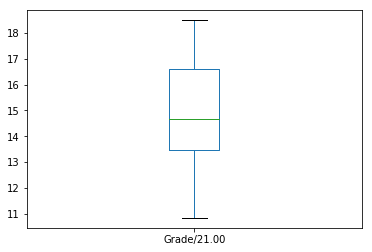

In [11]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape` attribute.

In [12]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    df = Q3_function(filenames, file)
    #Extracting rows which is the (index=0) element of the tuple returned by the shape method
    rows = df.shape[0]
    #Extracting columns which is the (index=1) element of the tuple returned by the shape method
    columns = df.shape[1]
    return rows,columns


# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the output from Question 5. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [15]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    #Using Q5 dataframe as per the remark by TA in Piazza
    Q10_df = copy.copy(df)
    
    #Updating missing values in the 'Q. 5 /12.00' column by 0
    Q10_df['Q.5/12.00'] = Q10_df['Q.5/12.00'].apply(pd.to_numeric,errors = 'coerce').replace(to_replace=np.nan,value=0)
    #Creating list of ids who scored zero
    zero_score_id = list(Q10_df[Q10_df['Q.5/12.00']==0].index)
    score_count = Q10_df.groupby(by='Q.5/12.00',sort=False)['Q.5/12.00'].count()
    #Identifying the max value for the column
    max_score = Q10_df['Q.5/12.00'].max()
    #Identifying number of students who scored the max marks
    max_score_count = score_count.loc[max_score]
    return zero_score_id, max_score_count

# Call the function and print the results
zero, maximum = Q10_function(Q5_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [9, 10, 13, 17, 18]
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [16]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """
    #Reading the dataset and removing duplicates from the datasets
    tuples_df = Q3_function(filenames, 'Tuples').drop_duplicates()
    tax_df = Q3_function(filenames, 'Taxonomy').drop_duplicates()
    #Extracting the dataframe(index = 1) from the return values of Q5_df
    tuples_mod_df = Q5_function(tuples_df)[1]
    tax_mod_df = Q5_function(tax_df)[1]
    #Doing inner join as mentioned in the Piazza post
    merged_df = tuples_mod_df.merge(tax_mod_df,how = 'inner',on='id',suffixes=['_tup','_tax'])
    merged_df['Total_score'] = merged_df['Grade/20.00']+merged_df['Grade/21.00']
    #Identifying id of student with max combined score
    max_score_id = merged_df[merged_df['Total_score']==merged_df['Total_score'].max()]['id'].iloc[0]
    return merged_df,max_score_id


# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

/Users/Shawn/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [17]:

def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    return sorted(list(df[df['time_tax'] + df['time_tup'] < 1200]['id']))


# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _Include the overall average in the groupings._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* Don't consider 'Overall Average' row.

In [18]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    #Removing the last row of the dataframe which contains the mean statistics row
    df = df.iloc[ :-1 , : ]
    df['grade_bins'] = pd.cut(df['Grade/45.00'],bins = 5,labels = np.array(['bin_' + str(i) for i in range(1,6)]))   
    grade_bin_df = df[['id','grade_bins']] 
    bin_dict = grade_bin_df.groupby(by='grade_bins').groups
    for key in bin_dict.keys():
        bin_dict[key] = [grade_bin_df.loc[:,'id'].iloc[i] for i in list(bin_dict[key])]
    bin_series = pd.Series(bin_dict)
    return bin_series


# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

bin_1           [15, 16, 17, 18]
bin_2               [12, 13, 14]
bin_3    [5, 6, 7, 8, 9, 10, 11]
bin_4                     [3, 4]
bin_5                  [0, 1, 2]
dtype: object


/Users/Shawn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [19]:
import unittest

class TestNotebook(unittest.TestCase):
    
    def test_Q01_function(self):
        
        ans=['./data_raw/Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', \
             './data_raw/Python-QUIZ Functions (18 min.)-grades.xlsx', \
             './data_raw/Python-QUIZ Coercion (6 min.)-grades.xlsx', \
             './data_raw/Python-QUIZ Strings (5 min.)-grades.xlsx', \
             './data_raw/Python-QUIZ Lists (10 min.)-grades.xlsx', \
             './data_raw/Python-QUIZ Iterations (6 min.)-grades.xlsx', \
             './data_raw/Python-QUIZ Sets (7 min)-grades.xlsx', \
             './data_raw/Python-QUIZ Exceptions (10 min.)-grades.xlsx',\
             './data_raw/Python-QUIZ Dictionaries (10 min.)-grades.xlsx', \
             './data_raw/Python-QUIZ Tuples (10 min.)-grades.xlsx', \
             './data_raw/Python-QUIZ Conditionals (6 min.)-grades.xlsx']
        
        result=Q1_function()
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result)

    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])

    def test_Q03_function(self):
        
        cols_ans=['State','Started on','Completed','Time taken','Grade/45.00','Q. 1 /5.00',\
                  'Q. 2 /10.00','Q. 3 /6.00','Q. 4 /6.00','Q. 5 /12.00','Q. 6 /6.00','id']
        Q3_df = Q3_function(filenames, s = "Functions")
        col_names_list = list(Q3_df.columns)

        self.assertEqual(cols_ans,col_names_list)
        
        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
    
    def test_Q05_function(self):
        
        cols_type_ans = ['int64','object','int64','int64','int64',\
                       'int64','object','object','object']
        col_names = ['id','Grade/45.00','Q.1/5.00','Q.2/10.00','Q.3/6.00',\
                     'Q.4/6.00','Q.5/12.00','Q.6/6.00','time']
        column_types, Q5_df = Q5_function(df_subset)
        self.assertEqual(cols_type_ans,column_types)
        self.assertEqual(col_names,list(Q5_df.columns))
     
    def test_Q06_function(self):
        
        cols_type_ans = ['id','Grade/45.00','Q.1/5.00','Q.2/10.00','Q.3/6.00',\
                         'Q.4/6.00','Q.5/12.00','Q.6/6.00','time']
        Q6_df = Q6_function(Q5_df)
        self.assertEqual(cols_type_ans,list(Q6_df.columns))
        
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        self.assertEqual(ans, result)
    
    def test_Q09_function(self):
        
        rows_ans = 17
        columns_ans = 7 
        rows, columns = Q9_function (file='Strings')
        self.assertEqual(rows_ans, rows)
        self.assertEqual(columns_ans, columns)

    def test_Q10_function(self):
        
        exp_zero_score_id = [9, 10, 13, 17, 18]
        exp_max_count_id = 2 
        act_zero_score_id, act_max_count_id = Q10_function(Q5_df)
        self.assertEqual(exp_zero_score_id, act_zero_score_id)
        self.assertEqual(exp_max_count_id, act_max_count_id)
        
    def test_Q11_function(self):
        
        exp_col_names = ['State_tup','Startedon_tup','Completed_tup','Grade/20.00',\
                         'Q.1/10.00','Q.2/10.00_tup','id','time_tup','State_tax',\
                         'Startedon_tax','Completed_tax','Grade/21.00','Q.1/5.00',\
                         'Q.2/10.00_tax','Q.3/6.00','time_tax','Total_score']
        exp_max_scorer = 10 
        output_df, act_max_scorer = Q11_function()
        self.assertEqual(exp_col_names, list(output_df.columns))
        self.assertEqual(exp_max_scorer, act_max_scorer)    
    
    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)
        
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = [temp.iloc[x] for x in range(len(temp))]
        
        for x in range(len(ans)):
            self.assertEqual(sum(result[x]), sum(ans[x]))

        
unittest.main(argv=[''], verbosity=2, exit=False) 

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... /Users/Shawn/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
ok
test_Q06_function (__main__.TestNotebook) ... ok
test_Q07_function (__main__.TestNotebook) ... ok
test_Q09_function (__main__.TestNotebook) ... ok
test_Q10_function (__main__.TestNotebook) ... ok
test_Q11_function (__main__.TestNotebook) ... ok
test_Q12_function (__main__.TestNotebook) ... ok
test_Q13_function (__main__.TestNotebook) ... /Users/Shawn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: 